# ECE 462 - Homework #6

## Code

### System Includes


In [3]:
import pandas as pd
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
from pylab import rcParams

### Function to find all possible combinations for a given number of balls and energy total

In [11]:
def combs(num_balls, required_sum, unique=False):
    valids = []
    if unique == True:
        possibilities = np.arange(required_sum + 1)
    elif unique == 'degenerate':
        possibilities = np.array([[val] * 2 for val in range(required_sum + 1) if val <= required_sum]).flatten()
    else:
        possibilities = np.array([[val] * num_balls for val in range(required_sum + 1) if val <= required_sum]).flatten()
    perms = list(permutations(possibilities, num_balls))
    valids = [np.sort(tupe) for tupe in perms if sum(tupe) == required_sum]
    if (len(valids) == 0):
        return pd.DataFrame(columns=["Ball {}".format(i+1) for i in range(num_balls)])
    
    return pd.DataFrame(np.unique(np.array(valids), axis=0), columns=["Ball {}".format(i+1) for i in range(num_balls)])

### Function to find the probability distribution of a given combination set

In [15]:
def prob_distribution(df):
    return (1.0 - (df.apply(pd.Series.value_counts, axis=1).isna().sum(axis='rows') / len(df.index))) * 100

### Function to plot a probability distribution

In [17]:
def plot_probs(df):
    rcParams['figure.figsize'] = 14, 8
    display(prob_distribution(df))

    plt.xlabel("Energy Level")
    plt.ylabel("Probability (%)")
    plt.ylim(0, 105)
    plt.grid(True, axis='y', linewidth=0.5)
    plt.plot(prob_distribution(df).index.values, prob_distribution(df).values, linewidth=3);

## Problems

### Problem 5.2.1

With $E=4$, and $n_{balls}=4$, the following combinations are possible:

In [19]:
df = combs(4, 4, unique=False)
display(df)

,Ball 1,Ball 2,Ball 3,Ball 4
0,0,0,0,4
1,0,0,1,3
2,0,0,2,2
3,0,1,1,2
4,1,1,1,1


With the distribution of these being (with the probability being the chance a given state is occupied):

0    80.0
1    60.0
2    40.0
3    20.0
4    20.0
dtype: float64

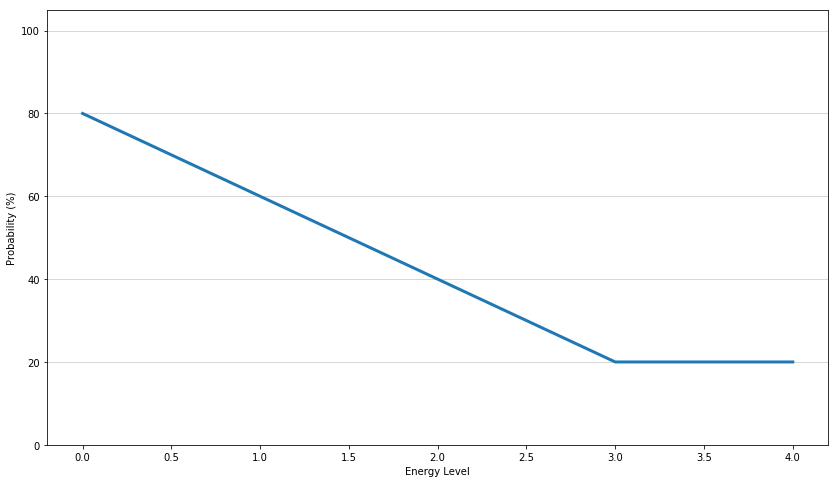

In [20]:
plot_probs(df)

### Problem 5.2.2

With five balls and a total energy of 12, the only valid distribution is:

In [21]:
df = combs(5, 12, unique=True)
display(df)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5
0,0,1,2,3,6
1,0,1,2,4,5


The distribution of this is (with the probability being the chance a given state is occupied):

0    100.0
1    100.0
2    100.0
3     50.0
4     50.0
5     50.0
6     50.0
dtype: float64

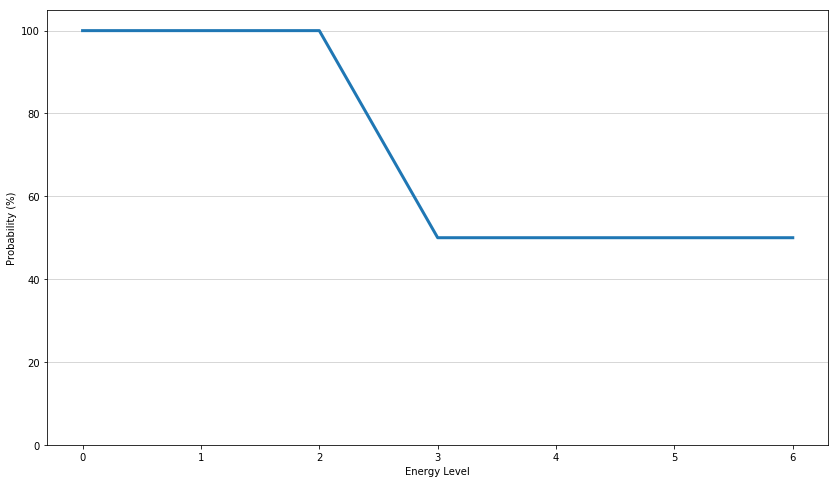

In [22]:
plot_probs(df)

### Problem 5.2.3

Below are the following valid states with five fermion particles totalling a combined energy of 8.

In [23]:
df = combs(5, 8, 'degenerate')
display(df)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5
0,0,0,1,1,6
1,0,0,1,2,5
2,0,0,1,3,4
3,0,0,2,2,4
4,0,0,2,3,3
5,0,1,1,2,4
6,0,1,1,3,3
7,0,1,2,2,3


The probability of occupation of each state is (with the probability being the chance a given state is occupied):

0    100.0
1     75.0
2     62.5
3     50.0
4     37.5
5     12.5
6     12.5
dtype: float64

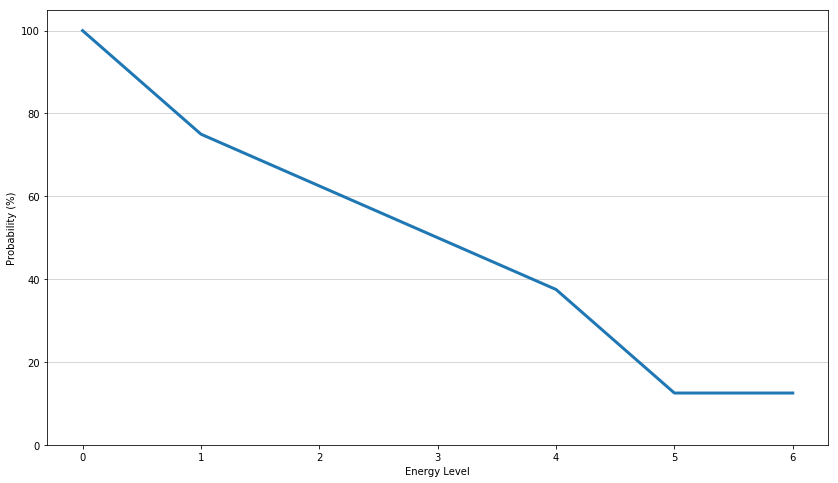

In [24]:
plot_probs(df)

### Problem 5.2.4

The Fermi-Dirac distribution is: 

$$f_F=\frac{1}{1+e^{\frac{E-E_F}{k_BT}}}$$

The approximation is valid only if:

$$e^{\frac{E-E_f}{k_BT}} >> 1$$

This shows that the _Boltzman Approximation_ is only valid if $E-E_f >> k_BT$.